In [73]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import tensorboard

In [138]:
rawdata = pd.read_csv("Churn_Modelling.csv")
rawdata

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


* Exited Column: 1 - Yes,  0 - No 
* Row Number, Customer ID, Surname won't play a role in prediction hence they are dropped. 

In [8]:
#Matrix of Features
x = rawdata.iloc[:,3:-1].values

In [123]:
#Matrix of Target variable
y = rawdata.iloc[:,-1].values

In [139]:
features_pp = pd.DataFrame(x)

# EDA

Check Descriptive statistics for complete data, customer who exited and did not.

In [58]:
rawdata.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [60]:
raw_0 = rawdata[rawdata['Exited'] == 0]
raw_0.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,2891.682053,7.174423e+04,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,2.000000,1.556570e+07,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,2526.500000,1.562882e+07,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,5042.000000,1.569154e+07,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,7525.500000,1.575335e+07,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [59]:
raw_1 =rawdata[rawdata['Exited'] == 1]
raw_1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,2866.855245,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,2419.000000,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,4871.000000,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,7404.000000,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


<u> Observation </u>
* Age - Means are quite different, might influence decision to exit.
* Other parameters appear to be same

In [ ]:
# Country 
sns.pairplot(features_pp, hue = 1)

In [ ]:
# Gender 
sns.pairplot(features_pp, hue = 2)

## Age - Statistical Analysis

In [62]:
Pair1 = raw_0['Age']
Pair2 = raw_1['Age']

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Exited - Yes')

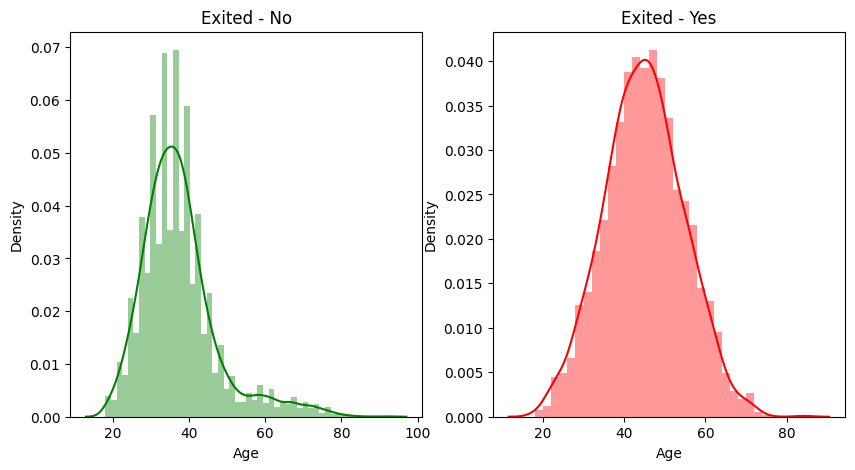

In [83]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plot = sns.distplot(Pair1, color="g")
plt.title('Exited - No')

plt.subplot(1,2,2)
plot = sns.distplot(Pair2, color="r")
plt.title('Exited - Yes')

The Two samples have unequal variances and unequal sample sizes and are two  independent samples. Hence we perform Paired T-test , Welch Test (*equal_var = False*)
- α = 0.05
- Null Hypothesis - 
$$
  \mu_{ExitAge} = \mu_{RetainedAge}
$$
- Alt Hypothesis - 
$$
  \mu_{ExitAge} \neq \mu_{RetainedAge}
$$

In [69]:
stats.ttest_ind(a= Pair1, b= Pair2,equal_var = False)

Ttest_indResult(statistic=-30.41919720440679, pvalue=4.7127272656641046e-179)

<u> Observation </u> - Very small p-value(<0.05) indicates we have evidence against null hypothesis

## Country & Gender

We'll check if there are country and gender influences the customers tendency to stay or leave the bank.

In [114]:
# Number of customer distribution
table = pd.pivot_table(rawdata, values ='Exited' ,index=['Geography'], columns=['Gender'], aggfunc="count")
print(table)

Number of Customers Gender     Female  Male
Geography              
France       2261  2753
Germany      1193  1316
Spain        1089  1388


In [116]:
# Number of customer retained distribution
table_0 = pd.pivot_table(raw_0, values ='Exited' ,index=['Geography'], columns=['Gender'], aggfunc="count")
print(table_0)

Gender     Female  Male
Geography              
France       1801  2403
Germany       745   950
Spain         858  1206


In [117]:
# Number of customer exited distribution
table_1 = pd.pivot_table(raw_1, values ='Exited' ,index=['Geography'], columns=['Gender'], aggfunc="count")
print(table_1)

Gender     Female  Male
Geography              
France        460   350
Germany       448   366
Spain         231   182


In [118]:
# Fraction of customers retained
table_0/table

Gender,Female,Male
Geography,,
France,0.796550,0.872866
Germany,0.624476,0.721884
Spain,0.787879,0.868876


In [119]:
# Fraction of customers exited
table_1/table

Gender,Female,Male
Geography,,
France,0.203450,0.127134
Germany,0.375524,0.278116
Spain,0.212121,0.131124


<u> Observation </u> - Percentage exit was higher in Germany compared to France and Spain for both genders (Male and Female)


In [96]:
table = pd.pivot_table(raw_0, values ='EstimatedSalary' ,index=['Geography'], columns=['Gender'], aggfunc=np.mean)
print(table)

Gender            Female           Male
Geography                              
France      98526.820627   99734.445789
Germany    103987.042242  101181.577505
Spain       98900.649091   98390.161260


In [95]:
table = pd.pivot_table(raw_1, values ='EstimatedSalary' ,index=['Geography'], columns=['Gender'], aggfunc=np.mean)
print(table)

Gender            Female           Male
Geography                              
France     103626.025065  103193.839686
Germany     99884.458728   96591.601257
Spain      107544.095758   98661.099011


Country and Gender are categorical data

In [120]:
#Gender - Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])


In [121]:
#Country - 1-Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

x = np.array(ct.fit_transform(x))

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Apart from usual, Scaling 1) improves optimization, hence smoothens the gradient descent 2) helps minimize the cost function quickly.

In [125]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ANN Model

In [126]:
#Initialize ANN Model
ann = tf.keras.Sequential()

units - randomly chosen, no right answer, comes from experience or hit & trial

In [127]:
# Add first, hidden and second layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Output Layer - Prediction of binary output (Churn - Yes or No).

In [128]:
#Add output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Model Compiling - Define optimizer, loss, metrics

In [129]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [136]:
#log model data and open on tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [137]:
#Train Model
ann.fit(X_train, Y_train, epochs = 100, callbacks = tensorboard_callback)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8637
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8658
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8651
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8671
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8656
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8669
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8665
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8670
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8656
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3314 - accura

In [92]:
#Weights and bias from last hidden layer to output layer
ann.layers[2].get_weights()

[array([[-0.8392728 ],
        [-1.1998901 ],
        [ 1.2809789 ],
        [ 0.86701953],
        [-0.25240153],
        [ 0.9309343 ]], dtype=float32),
 array([-0.33032572], dtype=float32)]

Making a Prediction

In [93]:
NewCustomer = np.array([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])

In [94]:
#probability of leaving
ann.predict(sc.transform(NewCustomer))

1/1 [==============================] - 0s 45ms/step


array([[0.03020105]], dtype=float32)

In [95]:
#Test Set Results
y_pred = ann.predict(X_test)

63/63 [==============================] - 0s 515us/step


In [96]:
#convert probability to Yes or No
Y_pred = (y_pred > 0.5)
Y_pred

In [98]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [99]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[1508   87]
 [ 192  213]]


In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8605